Importing Libraries

In [103]:
import os
import keras
import tensorflow as tf
from tensorflow import keras
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

Giving the Custom Created Dataset

In [104]:
TRANING_DATASET = "C:/Users/venky/OneDrive/Desktop/NN/Nums/Train/"
NOISY_DATASET = "C:/Users/venky/OneDrive/Desktop/NN/Nums/Noisy/"
STANDARD_DEVIATIONS = [0.001, 0.002, 0.003, 0.005, 0.01, 0.02, 0.03, 0.05,0.1]

Obtaining the image from Directory

In [105]:
def imagetensor(imagedir):
  temp=[]
  for image  in os.listdir(imagedir):
    im= Image.open(imagedir+image)
    im=im.convert('L')
    temp.append(np.array(im))
  
  images=np.array(temp)
  images=np.where(images<np.mean(images),0,1).astype('float64')
  return images

Training the Model

In [106]:
model_train = imagetensor("C:/Users/venky/OneDrive/Desktop/NN/Nums/Train/")
model_train=model_train.reshape(model_train.shape[0],1,256)
print(model_train.shape,model_train.dtype)

(10, 1, 256) float64


Single Layer Perceptron Model

In [107]:
model =keras.Sequential([
    keras.layers.Dense(256,activation=tf.nn.sigmoid,input_shape=(1,256)),
])
model.compile(optimizer=tf.keras.optimizers.Adam(),
    loss='mean_squared_error')
print('model summary')
model.summary()
print('Shapes & Bias')
for layer in model.layers:
    print(layer.name)
    print('Weights shape: ',layer.get_weights()[0].shape)
    print('Bias Shape: ',layer.get_weights()[1].shape)

model summary
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 1, 256)            65792     
                                                                 
Total params: 65,792
Trainable params: 65,792
Non-trainable params: 0
_________________________________________________________________
Shapes & Bias
dense_38
Weights shape:  (256, 256)
Bias Shape:  (256,)


In [108]:
model.fit(model_train,model_train,epochs=1500)

Epoch 1/1500
1/1 [==============================] - 0s 235ms/step - loss: 0.3014
Epoch 2/1500
1/1 [==============================] - 0s 3ms/step - loss: 0.2554
Epoch 3/1500
1/1 [==============================] - 0s 3ms/step - loss: 0.2137
Epoch 4/1500
1/1 [==============================] - 0s 2ms/step - loss: 0.1769
Epoch 5/1500
1/1 [==============================] - 0s 2ms/step - loss: 0.1453
Epoch 6/1500
1/1 [==============================] - 0s 3ms/step - loss: 0.1188
Epoch 7/1500
1/1 [==============================] - 0s 2ms/step - loss: 0.0971
Epoch 8/1500
1/1 [==============================] - 0s 3ms/step - loss: 0.0797
Epoch 9/1500
1/1 [==============================] - 0s 2ms/step - loss: 0.0662
Epoch 10/1500
1/1 [==============================] - 0s 3ms/step - loss: 0.0559
Epoch 11/1500
1/1 [==============================] - 0s 4ms/step - loss: 0.0481
Epoch 12/1500
1/1 [==============================] - 0s 3ms/step - loss: 0.0424
Epoch 13/1500
1/1 [============================

Predicting the Model over the Custom Dataset

In [109]:
predict = model.predict(model_train) 

In [110]:
def display(oi,pi,single_line=False):
     for i in range(0,oi.shape[0]):
        fig, axis= plt.subplots(1,2) if single_line else plt.subplots(2,sharex=True)
        plt.subplots_adjust(top=1)
        axis[0].set_title('Original Image')
        axis[1].set_title('Predicted Image')
        axis[0].imshow(oi[i].reshape(16,16),cmap="gray",)
        axis[1].imshow(pi[i].reshape(16,16),cmap="gray")


(10, 1, 256) (10, 1, 256)


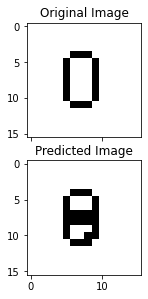

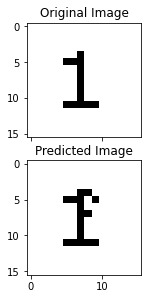

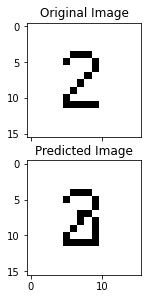

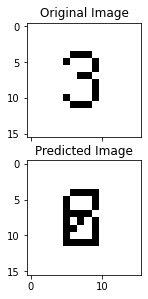

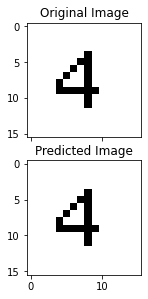

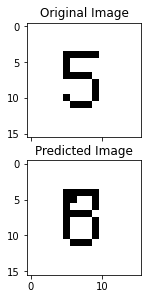

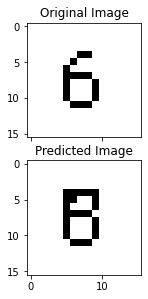

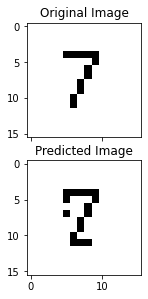

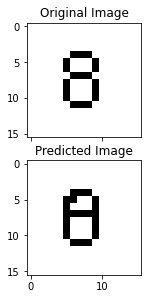

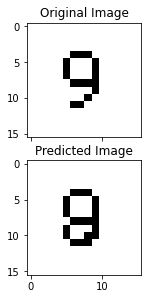

In [111]:
model_train = np.where(model_train<np.mean(model_train),0,1).astype('float64')
predict = np.where(predict<np.mean(predict),0,1).astype('float64')
print(model_train.shape,predict.shape)

display(model_train,predict)

Adding Noise to the Images based on their Standard Deviations

In [63]:
def noisy(images):
    
    var = [0.001, 0.002, 0.003, 0.005, 0.01, 0.02, 0.03, 0.05,0.1]

    for std in var:
        for image_name, image in enumerate(images):
            row,col= image.shape
            noise_pixels=np.ones([16,16],dtype='float64')
            mean = 0            
            gauss = np.random.normal(mean,std**0.5,(row,col))
            for i in range(25):
                x=np.random.choice(16)
                y=np.random.choice(16)
                noise_pixels[x][y]=gauss[x][y]
            noisy = image + noise_pixels
            noisy =np.where(noisy<noisy.mean(),0,1).astype('float64')
            plt.imsave(f"C:/Users/venky/OneDrive/Desktop/NN/Nums/Noisy/{std}/{image_name}.jpg",noisy,cmap='gray')
    return noisy
noisy(imagetensor("C:/Users/venky/OneDrive/Desktop/NN/Nums/Train/"))

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1.],
       [1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0.],
       [1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0.],
       [0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1.],
       [1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.],
       [1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,

Predictions for Noisy data with Standard Deviation


C:\Users\venky\AppData\Local\Temp/ipykernel_18656/1529463694.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axis= plt.subplots(1,2) if single_line else plt.subplots(2,sharex=True)


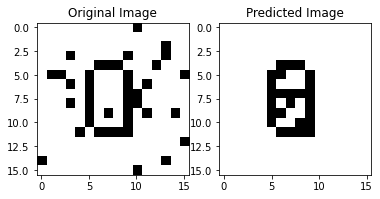

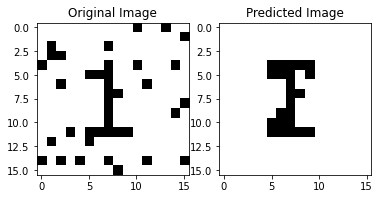

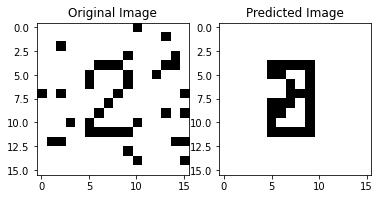

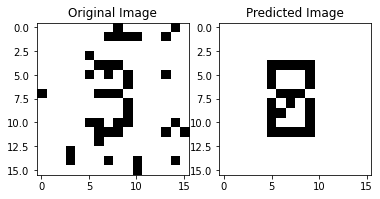

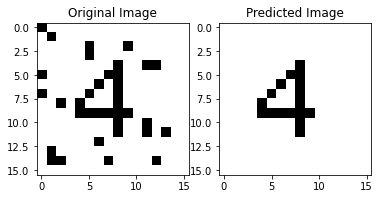

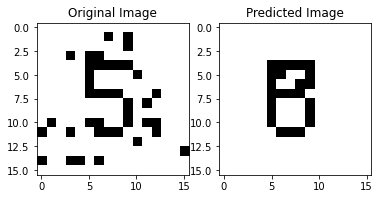

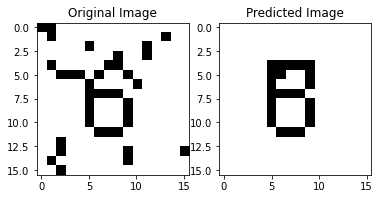

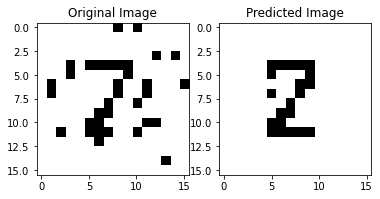

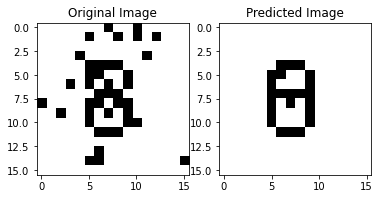

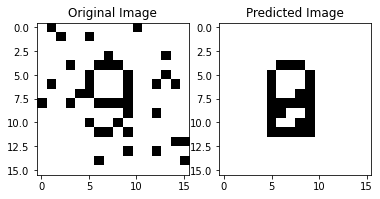

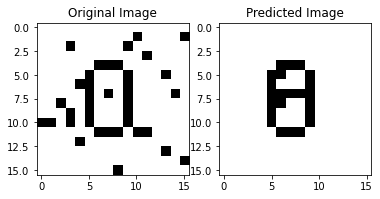

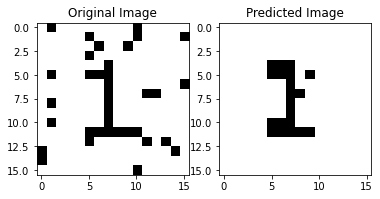

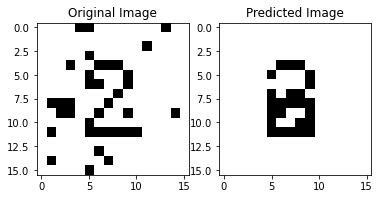

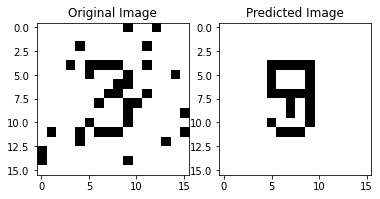

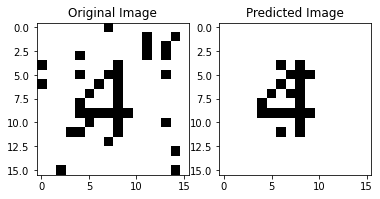

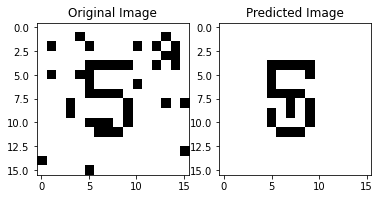

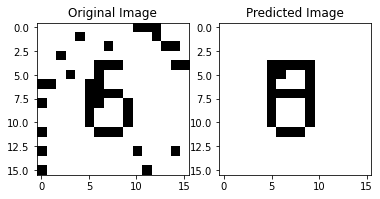

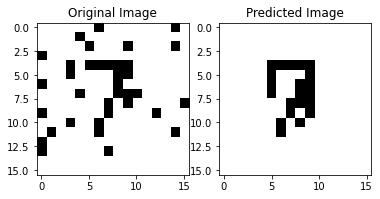

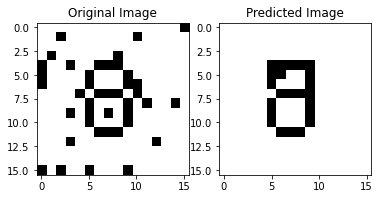

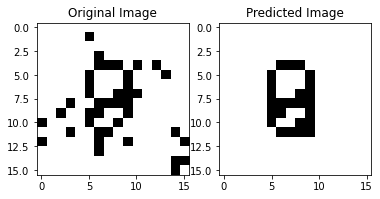

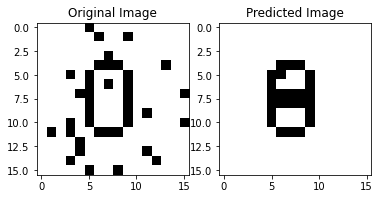

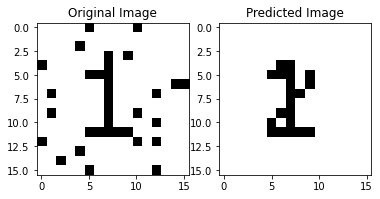

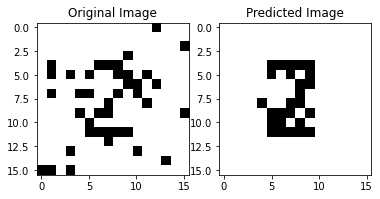

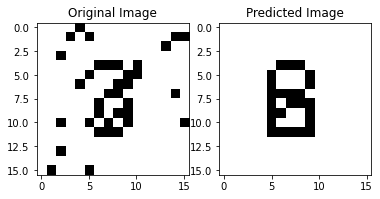

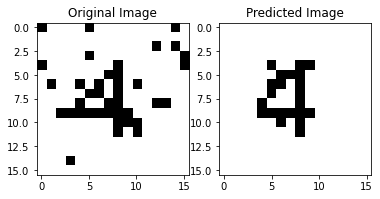

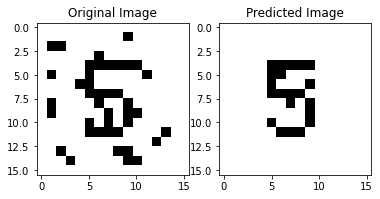

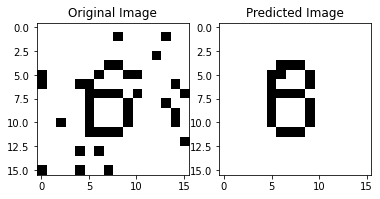

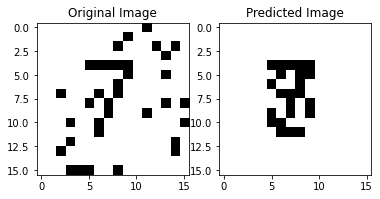

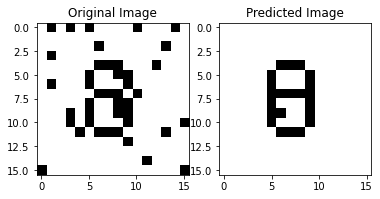

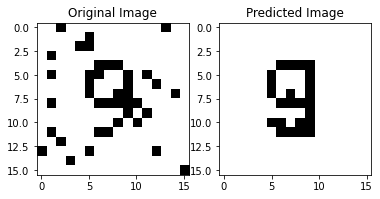

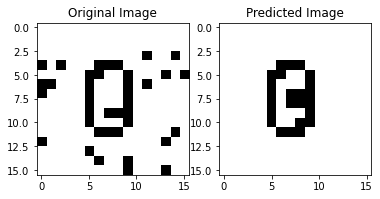

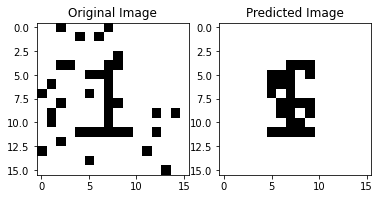

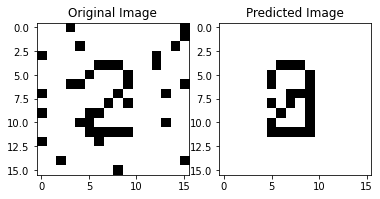

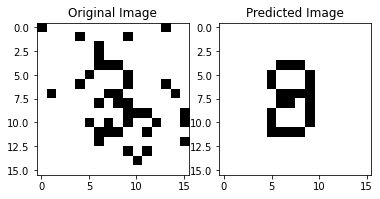

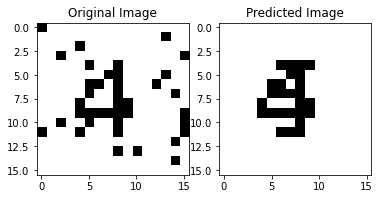

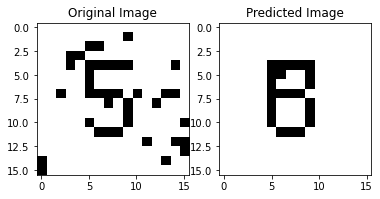

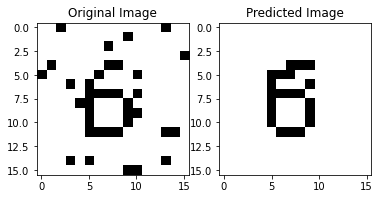

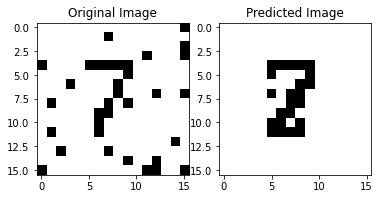

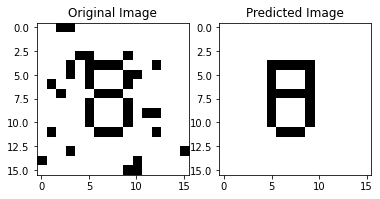

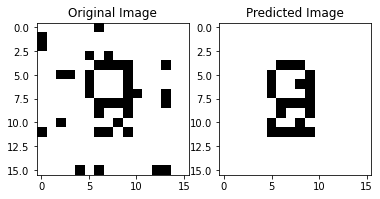

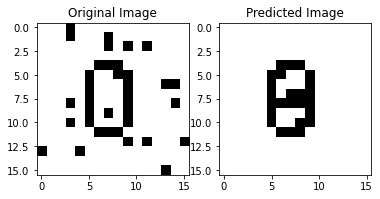

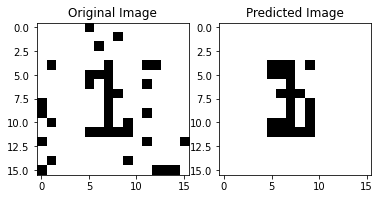

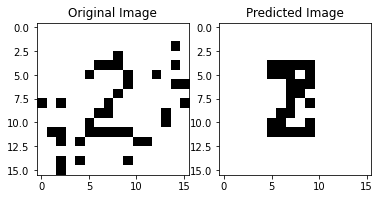

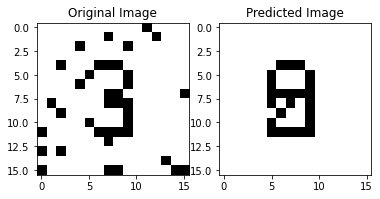

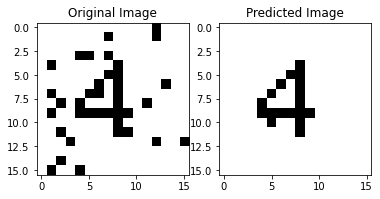

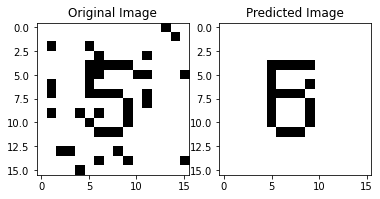

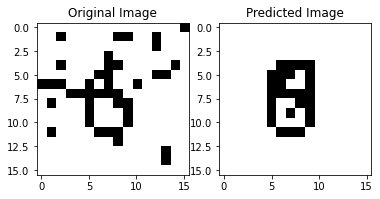

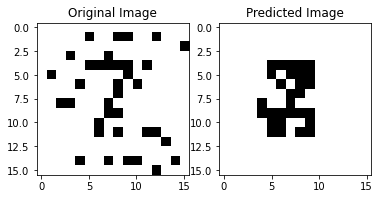

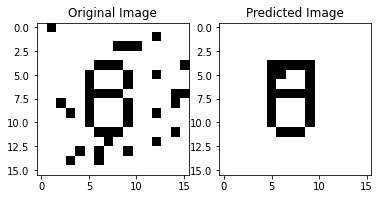

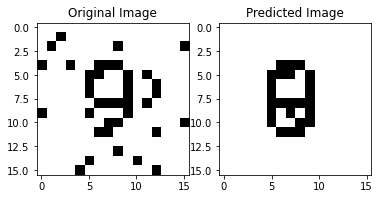

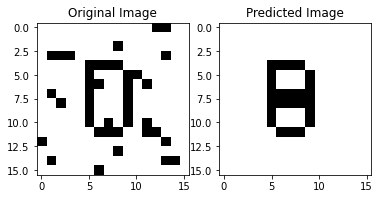

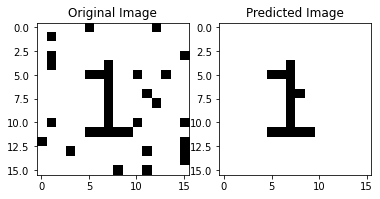

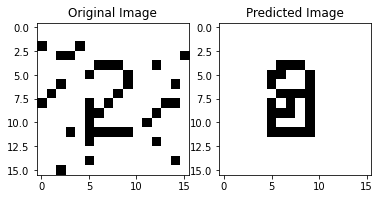

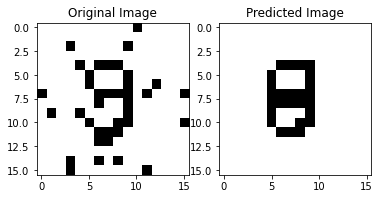

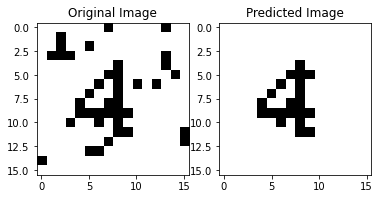

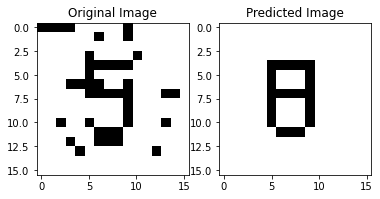

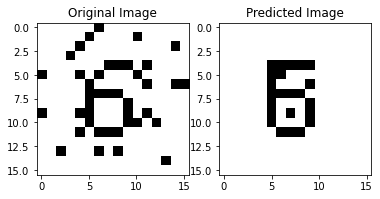

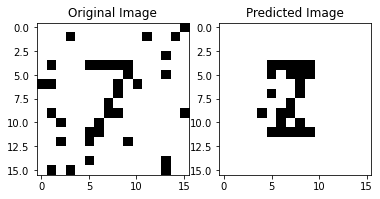

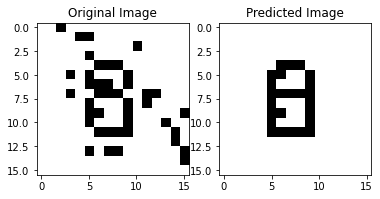

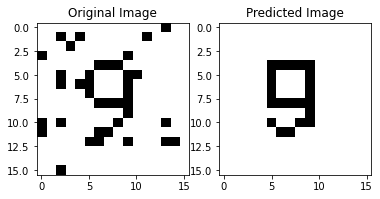

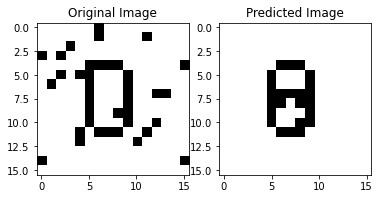

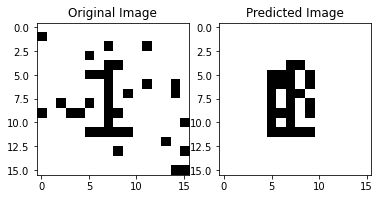

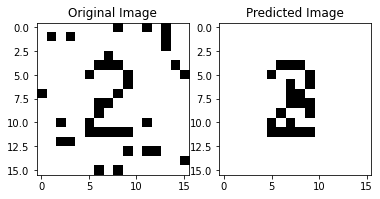

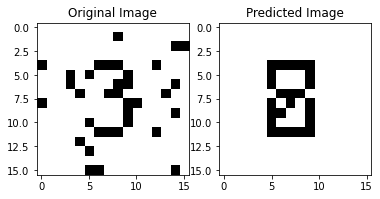

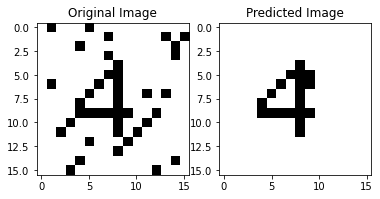

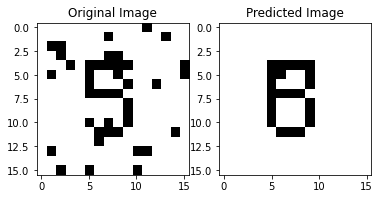

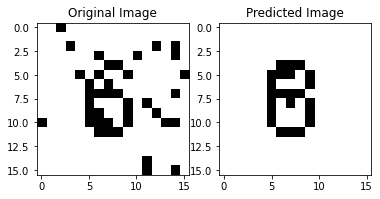

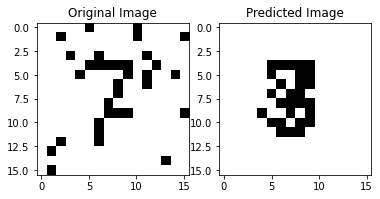

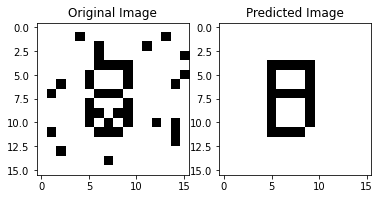

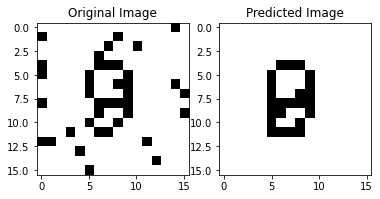

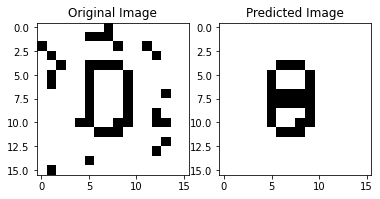

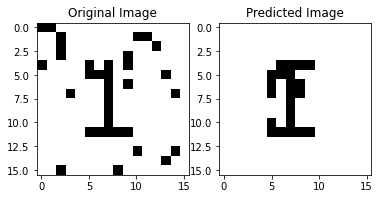

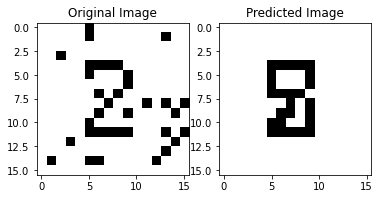

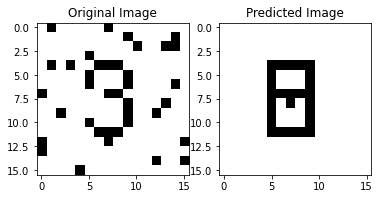

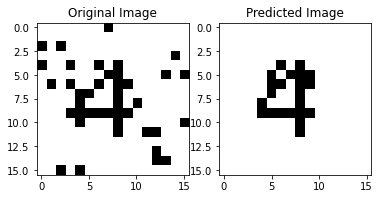

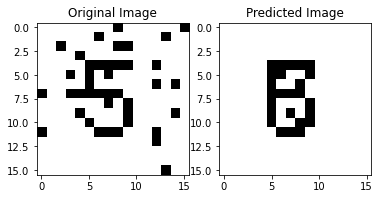

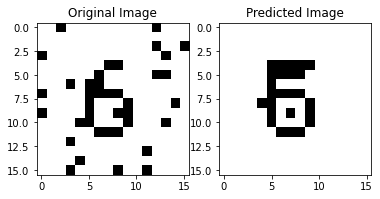

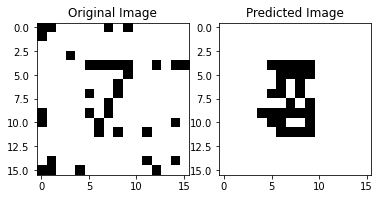

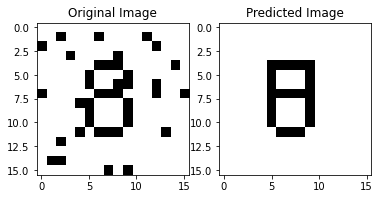

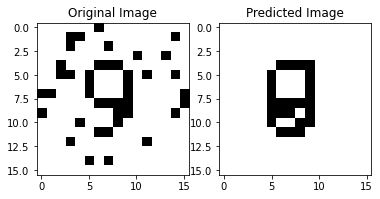

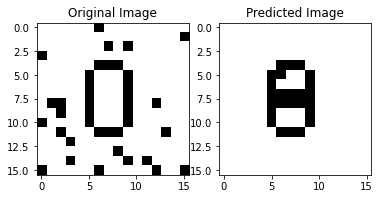

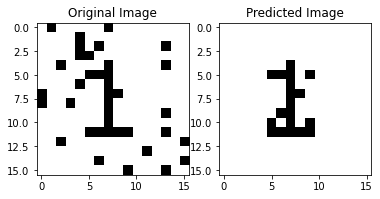

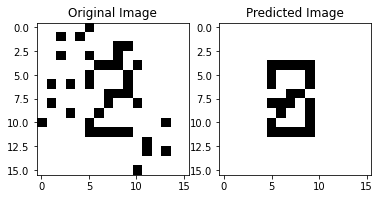

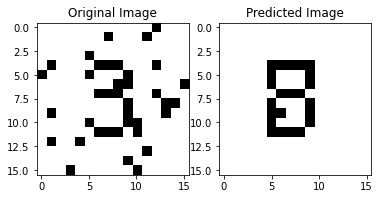

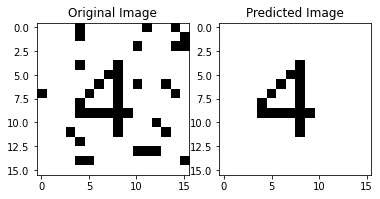

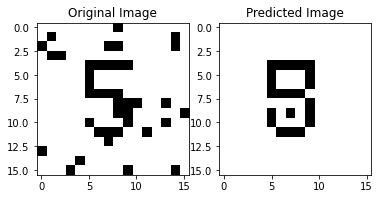

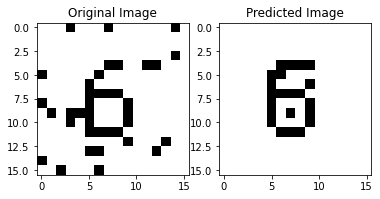

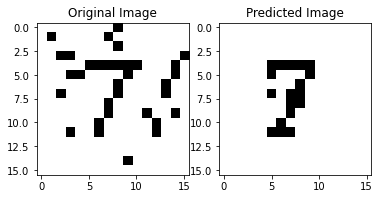

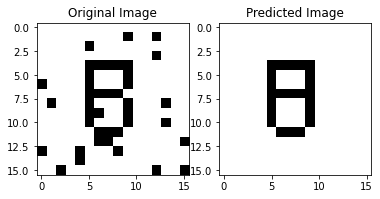

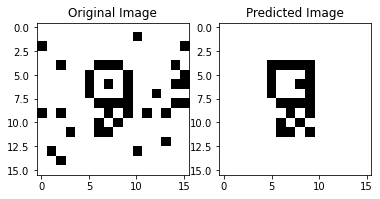

In [64]:
var = [0.001, 0.002, 0.003, 0.005, 0.01, 0.02, 0.03, 0.05,0.1]
noisy_model_prediction_data = {}
print("Predictions for Noisy data with Standard Deviation")
for std in var:
    noisy_model = imagetensor(f"C:/Users/venky/OneDrive/Desktop/NN/Nums/Noisy/{std}/")
    noisy_model = noisy_model.reshape(model_train.shape[0],1,256)
    noisy_model = np.where(noisy_model<np.mean(noisy_model),0,1).astype('float64')

    noisy_predict = model.predict(noisy_model)
    noisy_predict = np.where(noisy_predict<np.mean(noisy_predict),0,1).astype('float64')
    
    noisy_model_prediction_data[std] = noisy_predict
    display(noisy_model,noisy_predict,True)

Calculating Fh and Ffa

In [65]:
def calculate_fh_ffa(original_data, predicted_data):

    correctly_predicted_black_pixels_count = 0
    wrongly_predicted_black_pixels_count = 0

    whites_original = np.count_nonzero(original_data==1)
    blacks_original = np.count_nonzero(original_data==0)

    for i in range(16):
        for j in range(16):
            if original_data[i][j] == 0 and predicted_data[i][j] == 0:
                correctly_predicted_black_pixels_count += 1
            elif original_data[i][j] == 1 and predicted_data[i][j] == 0:
                wrongly_predicted_black_pixels_count += 1
                
    fh = correctly_predicted_black_pixels_count/blacks_original
    ffa = wrongly_predicted_black_pixels_count/whites_original
    
    return fh,ffa

In [66]:
all_metrics = {}
var = [0.001, 0.002, 0.003, 0.005, 0.01, 0.02, 0.03, 0.05, 0.1]
metric_original = imagetensor("C:/Users/venky/OneDrive/Desktop/NN/Nums/Train/")
metric_original = metric_original.reshape(metric_original.shape[0],1,256)


metric_predicted = model.predict(metric_original)
noisy_model_prediction_data[0] = metric_predicted
metric_original = np.where(metric_original<np.mean(metric_original),0,1).astype('float64')
metric_original = metric_original.reshape(metric_original.shape[0],16,16)

for k,v in noisy_model_prediction_data.items():

    metric_predicted = np.where(v<np.mean(v),0,1).astype('float64')
    metric_predicted = metric_predicted.reshape(metric_predicted.shape[0],16,16)

    all_metrics[k] = {}
    
    for i in range(10):
        all_metrics[k][i] = calculate_fh_ffa(metric_original[i],metric_predicted[i])

print(all_metrics)

{0.001: {0: (1.0, 0.03361344537815126), 1: (1.0, 0.0371900826446281), 2: (1.0, 0.04979253112033195), 3: (1.0, 0.04149377593360996), 4: (1.0, 0.0), 5: (1.0, 0.025210084033613446), 6: (1.0, 0.02510460251046025), 7: (1.0, 0.036885245901639344), 8: (1.0, 0.016877637130801686), 9: (1.0, 0.03765690376569038)}, 0.002: {0: (1.0, 0.02100840336134454), 1: (1.0, 0.024793388429752067), 2: (1.0, 0.04149377593360996), 3: (1.0, 0.03319502074688797), 4: (1.0, 0.016736401673640166), 5: (1.0, 0.01680672268907563), 6: (1.0, 0.029288702928870293), 7: (1.0, 0.036885245901639344), 8: (1.0, 0.016877637130801686), 9: (1.0, 0.03347280334728033)}, 0.003: {0: (1.0, 0.029411764705882353), 1: (1.0, 0.024793388429752067), 2: (1.0, 0.04564315352697095), 3: (1.0, 0.04149377593360996), 4: (1.0, 0.02092050209205021), 5: (1.0, 0.012605042016806723), 6: (1.0, 0.016736401673640166), 7: (1.0, 0.045081967213114756), 8: (1.0, 0.012658227848101266), 9: (1.0, 0.029288702928870293)}, 0.005: {0: (1.0, 0.025210084033613446), 1: (

Graph Plot for Fh and Ffa

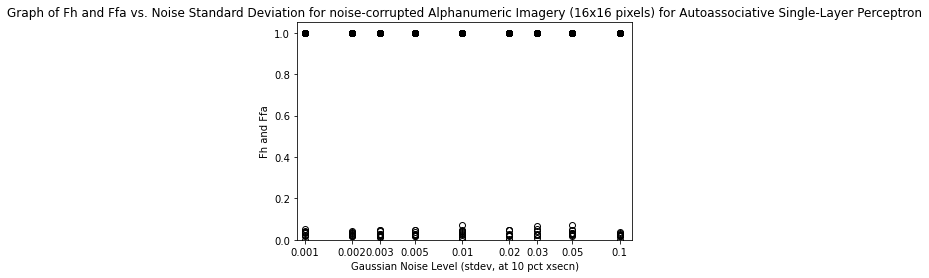

In [67]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()

ax.set_title("Graph of Fh and Ffa vs. Noise Standard Deviation for noise-corrupted Alphanumeric Imagery (16x16 pixels) for Autoassociative Single-Layer Perceptron")
ax.set_xlabel("Gaussian Noise Level (stdev, at 10 pct xsecn)")
ax.set_ylabel("Fh and Ffa")
ax.set_xlim(0.0009, 0.12)
ax.set_ylim(0,1.05)

ax.set_xscale("log",base=2)
ax.set_xticks(var)
ax.set_xticklabels(var)

for i in range(10):
    for j in var:
        ax.plot(j, all_metrics[j][i][0], 'o', color='black')
        ax.plot(j, all_metrics[j][i][1], 'o', color='black', markerfacecolor='none')
plt.show()

Three-Layer Shallow Multilayer Neural Network(Bonus)

In [137]:
SMM_model = keras.Sequential([
    keras.layers.Dense(256,activation=tf.nn.sigmoid,input_shape=(1,256),),
    keras.layers.Dense(256,activation=tf.nn.sigmoid),
    keras.layers.Dense(256,activation=tf.nn.sigmoid),
])
SMM_model.compile(optimizer=tf.keras.optimizers.Adam(),
    loss='mean_squared_error')
print('model summary')
SMM_model.summary()
print('Shapes & Bias')
for layer in SMM_model.layers:
    print(layer.name)
    print('Weights shape: ',layer.get_weights()[0].shape)
    print('Bias Shape: ',layer.get_weights()[1].shape)

model summary
Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 1, 256)            65792     
                                                                 
 dense_53 (Dense)            (None, 1, 256)            65792     
                                                                 
 dense_54 (Dense)            (None, 1, 256)            65792     
                                                                 
Total params: 197,376
Trainable params: 197,376
Non-trainable params: 0
_________________________________________________________________
Shapes & Bias
dense_52
Weights shape:  (256, 256)
Bias Shape:  (256,)
dense_53
Weights shape:  (256, 256)
Bias Shape:  (256,)
dense_54
Weights shape:  (256, 256)
Bias Shape:  (256,)


In [138]:
model_trains = imagetensor("C:/Users/venky/OneDrive/Desktop/NN/Nums/Train/")
model_trains=model_trains.reshape(model_trains.shape[0],1,256)
print(model_trains.shape,model_trains.dtype)

(10, 1, 256) float64


In [142]:
SMM_model.fit(model_trains,model_trains,epochs=850)

Epoch 1/850
1/1 [==============================] - 0s 5ms/step - loss: 0.0063
Epoch 2/850
1/1 [==============================] - 0s 5ms/step - loss: 0.0062
Epoch 3/850
1/1 [==============================] - 0s 4ms/step - loss: 0.0062
Epoch 4/850
1/1 [==============================] - 0s 5ms/step - loss: 0.0061
Epoch 5/850
1/1 [==============================] - 0s 3ms/step - loss: 0.0061
Epoch 6/850
1/1 [==============================] - 0s 5ms/step - loss: 0.0060
Epoch 7/850
1/1 [==============================] - 0s 3ms/step - loss: 0.0059
Epoch 8/850
1/1 [==============================] - 0s 4ms/step - loss: 0.0059
Epoch 9/850
1/1 [==============================] - 0s 3ms/step - loss: 0.0058
Epoch 10/850
1/1 [==============================] - 0s 3ms/step - loss: 0.0058
Epoch 11/850
1/1 [==============================] - 0s 4ms/step - loss: 0.0057
Epoch 12/850
1/1 [==============================] - 0s 3ms/step - loss: 0.0056
Epoch 13/850
1/1 [==============================] - 0s 3ms/st

In [143]:
SMM_predict=SMM_model.predict(model_trains)

(10, 1, 256) (10, 1, 256)


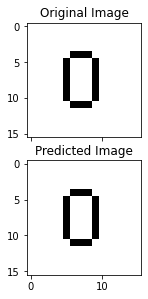

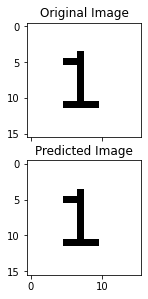

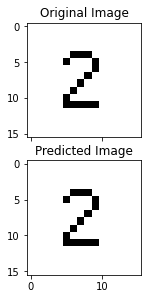

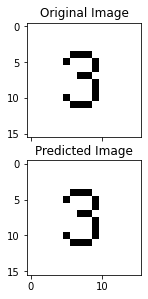

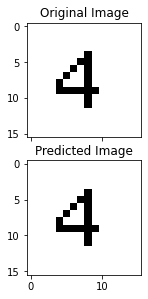

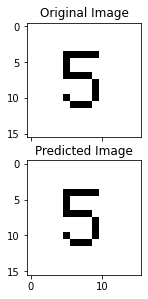

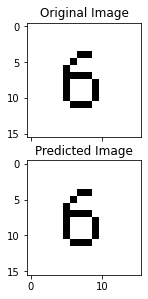

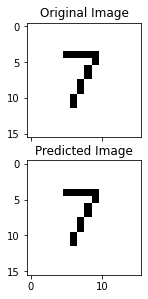

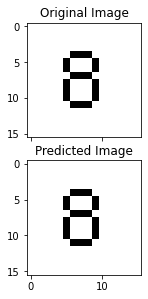

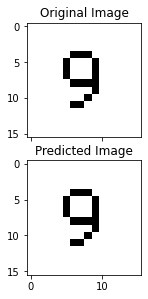

In [144]:
model_trains = np.where(model_trains<np.mean(model_trains),0,1).astype('float64')
SMM_predict = np.where(SMM_predict<np.mean(SMM_predict),0,1).astype('float64')
print(model_trains.shape,SMM_predict.shape)

display(model_trains,SMM_predict)